In [1]:
def process_fold(fold):
    data_directory = Path('dataforTrain')
    data = ImageDataBunch.from_folder(data_directory, ds_tfms=[], size=224)
    data.normalize(imagenet_stats)
    learn = cnn_learner(data, models.resnet34, metrics=error_rate)
    learn.fit_one_cycle(3)
    learn.unfreeze()
    learn.fit_one_cycle(1)
    learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))


In [2]:
import torch
torch.cuda.current_device()

0

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram 
import librosa 
import numpy as np


In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

In [17]:
! pip install librosa 

     |████████████████████████████████| 1.6MB 7.0MB/s eta 0:00:01
     |████████████████████████████████| 327kB 32.7MB/s eta 0:00:01
     |████████████████████████████████| 3.5MB 49.4MB/s eta 0:00:01
     |████████████████████████████████| 20.4MB 44.8MB/s eta 0:00:01
  Stored in directory: /home/hermanwu/.cache/pip/wheels/49/1d/38/c8ad12fcad67569d8e730c3275be5e581bd589558484a0f881
  Stored in directory: /home/hermanwu/.cache/pip/wheels/b9/64/09/0b6417df9d8ba8bc61a7d2553c5cebd714ec169644c88fc012
  Stored in directory: /home/hermanwu/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy


In [14]:
! pip install fastai 

     |████████████████████████████████| 235kB 7.7MB/s eta 0:00:01
     |████████████████████████████████| 30.8MB 19.9MB/s eta 0:00:01
     |████████████████████████████████| 112kB 60.3MB/s eta 0:00:01
     |████████████████████████████████| 102kB 40.4MB/s ta 0:00:01
     |████████████████████████████████| 163kB 62.5MB/s eta 0:00:01
     |████████████████████████████████| 92kB 30.1MB/s eta 0:00:01
     |████████████████████████████████| 3.2MB 43.1MB/s eta 0:00:01
     |████████████████████████████████| 184kB 63.2MB/s eta 0:00:01
     |████████████████████████████████| 2.1MB 44.6MB/s eta 0:00:01
  Stored in directory: /home/hermanwu/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
  Stored in directory: /home/hermanwu/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
Successfully built nvidia-ml-py3 bottleneck


In [8]:
print(torch.__version__)

1.5.1


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('dataforTrain.zip', 'r')
zip_ref.extractall('.')
zip_ref.close()

In [11]:
data_directory = Path('dataforTrain')
# don't use any transformations because it doesn't make sense in the case of a spectrogram
# i.e. flipping a spectrogram changes the meaning
data = ImageDataBunch.from_folder(data_directory, ds_tfms=[], size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (4110 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
neg,neg,neg,neg,neg
Path: dataforTrain;

Valid: LabelList (386 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
neg,neg,neg,neg,neg
Path: dataforTrain;

Test: None

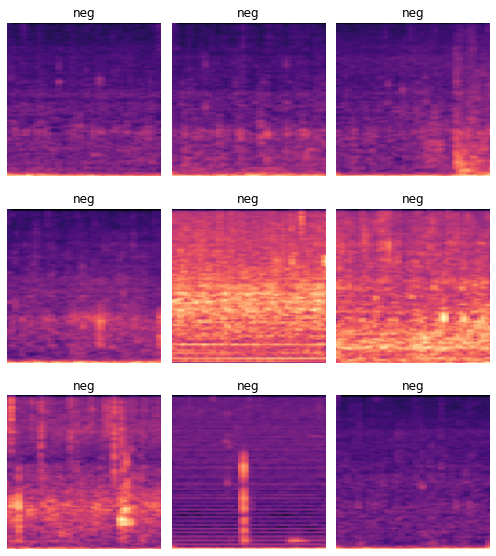

In [12]:
data.show_batch(rows=3, figsize=(7,8))


In [13]:
process_fold('')


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/hermanwu/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100.0%


epoch,train_loss,valid_loss,error_rate,time
0,0.770099,0.304394,0.077720,00:52
1,0.313124,0.250364,0.049223,00:43
2,0.150904,0.240107,0.046632,01:28


epoch,train_loss,valid_loss,error_rate,time
0,0.097355,0.189664,0.033679,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.058639,0.188404,0.036269,01:03
1,0.050446,0.194559,0.036269,01:04
2,0.038011,0.183149,0.036269,01:19


In [14]:
data_directory = Path('dataforTrain')
data = ImageDataBunch.from_folder(data_directory, ds_tfms=[], size=224)
data.normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(3)
learn.unfreeze()
learn.fit_one_cycle(1)
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.768885,0.469244,0.186529,01:15
1,0.312297,0.247189,0.054404,01:18
2,0.144231,0.265197,0.051813,01:19


epoch,train_loss,valid_loss,error_rate,time
0,0.113336,0.217357,0.036269,01:39


epoch,train_loss,valid_loss,error_rate,time
0,0.062701,0.225087,0.036269,01:57
1,0.049049,0.250811,0.036269,02:17
2,0.042269,0.254466,0.036269,01:37
3,0.037124,0.251605,0.036269,01:29


In [15]:
learn.save('orca-detection-stage-1')

epoch,train_loss,valid_loss,error_rate,time
0,0.041946,0.359085,0.033679,01:29
1,0.080255,0.860166,0.036269,01:46
2,0.063059,0.170821,0.025907,01:36
3,0.046273,0.234903,0.033679,01:45
4,0.023393,0.214604,0.031088,01:50


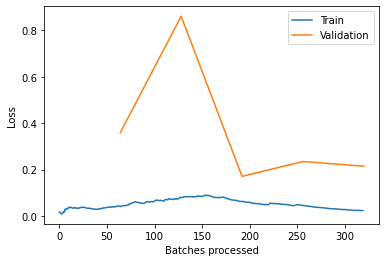

In [16]:
learn.fit_one_cycle(5)
learn.recorder.plot_losses()

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

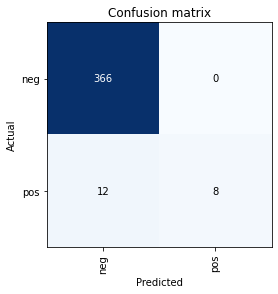

In [18]:
interp.plot_confusion_matrix()

epoch,train_loss,valid_loss,error_rate,time
0,0.002914,0.243027,0.036269,00:59
1,0.002389,0.410000,0.038860,00:52
2,0.048061,0.226930,0.031088,01:25
3,0.039644,0.336658,0.031088,01:37
4,0.022788,0.271655,0.023316,03:31
5,0.011165,0.286534,0.031088,04:42
6,0.004128,0.407790,0.033679,04:43
7,0.001906,0.297358,0.025907,01:46
8,0.000895,0.290828,0.025907,02:13
9,0.000406,0.337592,0.025907,02:01


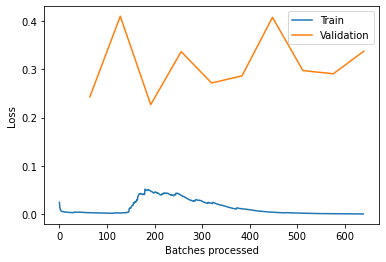

In [23]:
learn.fit_one_cycle(10)
learn.recorder.plot_losses()

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

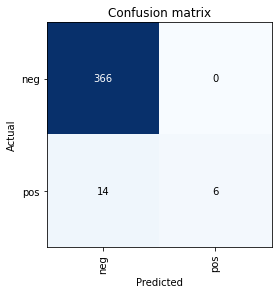

In [21]:
interp.plot_confusion_matrix()


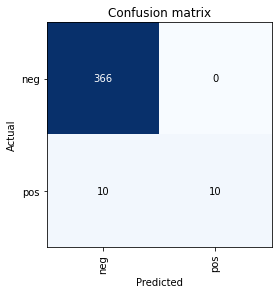

In [25]:
interp.plot_confusion_matrix()

epoch,train_loss,valid_loss,error_rate,time
0,0.000504,0.354470,0.025907,00:59
1,0.000518,0.453328,0.028497,01:05
2,0.047918,0.792235,0.041451,01:18
3,0.043354,0.291178,0.033679,01:03
4,0.057305,0.298566,0.033679,01:32
5,0.030731,0.407818,0.041451,01:46
6,0.011607,0.331704,0.028497,01:48
7,0.005827,0.316817,0.031088,02:01
8,0.002569,0.342357,0.031088,02:02
9,0.001260,0.344290,0.031088,01:48


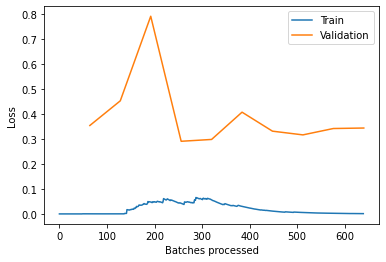

In [27]:
learn.fit_one_cycle(10)
learn.recorder.plot_losses()

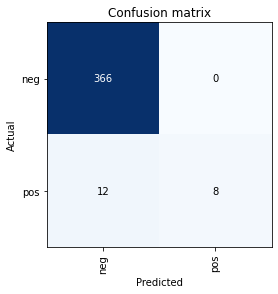

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

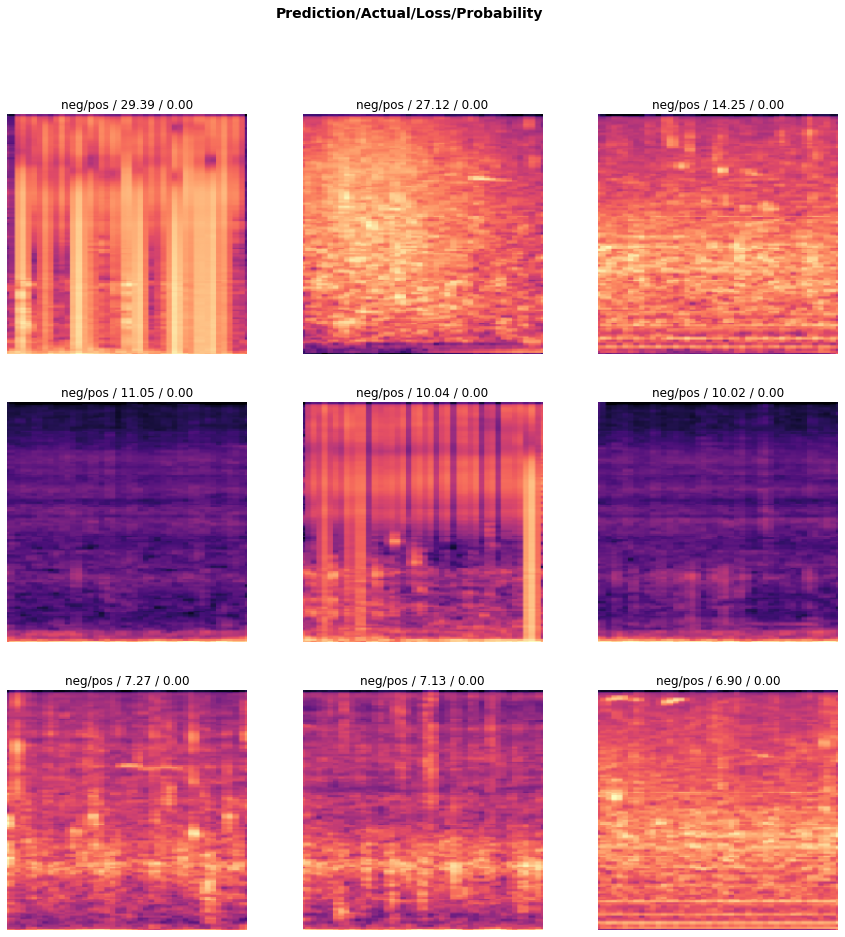

In [26]:
interp.plot_top_losses(9, figsize=(15,15))

In [35]:
# ResNet 34

def process_fold2_ResNet30_fit20(fold):
    data_directory = Path('dataforTrain')
    data = ImageDataBunch.from_folder(data_directory, ds_tfms=[], size=224)
    data.normalize(imagenet_stats)
    learn = cnn_learner(data, models.resnet34, metrics=error_rate)
    learn.fit_one_cycle(3)
    learn.unfreeze()
    learn.fit_one_cycle(1)
    learn.fit_one_cycle(20, max_lr=slice(1e-6,1e-4))


In [36]:
process_fold2_ResNet30_fit20('')

epoch,train_loss,valid_loss,error_rate,time
0,0.739632,0.329071,0.111399,00:43
1,0.304794,0.230274,0.046632,00:39
2,0.153807,0.231249,0.046632,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.115216,0.257198,0.038860,01:13


epoch,train_loss,valid_loss,error_rate,time
0,0.080228,0.263431,0.038860,01:04
1,0.072209,0.256782,0.038860,01:28
2,0.060104,0.253963,0.038860,01:45
3,0.050667,0.268113,0.038860,01:53
4,0.041987,0.256365,0.038860,02:02
5,0.029542,0.247364,0.038860,01:53
6,0.019402,0.243648,0.038860,01:58
7,0.011818,0.233296,0.038860,01:49
8,0.008957,0.243028,0.038860,01:45
9,0.006699,0.235217,0.038860,01:46


In [37]:
learn.fit_one_cycle(20, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.000650,0.348785,0.031088,01:50
1,0.000758,0.348550,0.031088,01:45
2,0.002945,0.344843,0.031088,02:11
3,0.001516,0.353060,0.031088,02:26
4,0.001011,0.379562,0.031088,01:38
5,0.000601,0.369407,0.031088,01:51
6,0.000874,0.354274,0.031088,01:44
7,0.000536,0.356427,0.031088,01:44
8,0.000833,0.365045,0.031088,01:42
9,0.000537,0.388025,0.031088,01:41


In [38]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.000169,0.396992,0.033679,01:48
1,0.013167,0.501881,0.033679,01:44
2,0.031633,1.051697,0.031088,01:44
3,0.043493,0.891797,0.036269,01:42
4,0.038649,0.691203,0.038860,01:43
5,0.014573,0.482356,0.033679,01:48
6,0.004659,0.501396,0.033679,01:44
7,0.001638,0.525960,0.031088,01:46
8,0.000721,0.574821,0.033679,01:44
9,0.000432,0.557817,0.033679,01:43


In [31]:
# ResNet 50 

def process_fold2_ResNet50(fold):
    data_directory = Path('dataforTrain')
    data = ImageDataBunch.from_folder(data_directory, ds_tfms=[], size=224)
    data.normalize(imagenet_stats)
    learn = cnn_learner(data, models.resnet50, metrics=error_rate)
    learn.fit_one_cycle(3)
    learn.unfreeze()
    learn.fit_one_cycle(1)
    learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))


In [32]:
process_fold2_ResNet50('')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/hermanwu/.cache/torch/checkpoints/resnet50-19c8e357.pth
100.0%


epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 6.00 GiB total capacity; 4.56 GiB already allocated; 34.62 MiB free; 4.69 GiB reserved in total by PyTorch)